In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(10)
images = digits.data.reshape(-1, 8, 8)

In [4]:
pca = PCA(n_components=17)
X_transformed = pca.fit_transform(digits.data.astype(float))

#### Задача 1. Выпишите явное линейное преобразование, которое отображает точку из подространства главных компонент в исходное пространство

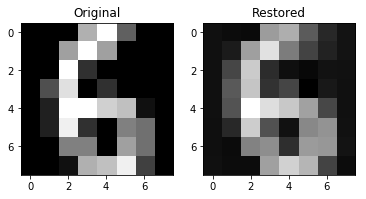

In [11]:
res = np.dot(X_transformed, pca.components_) + pca.mean_

i = 532
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(res[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

#### Задача 2. Определите, сколько нужно взять главных компонент, чтобы объяснить 99%, 95%, 90%, и 85% исходной дисперсии.

In [27]:
pca = PCA(n_components=64)
X_transformed = pca.fit_transform(digits.data.astype(float))

In [31]:
[[i,pca.explained_variance_[:i].sum() / pca.explained_variance_.sum()] for i in range(16,42)]

[[16, 0.849402492419831],
 [17, 0.8625883844271054],
 [18, 0.8750697626053608],
 [19, 0.8852469422085766],
 [20, 0.8943031165985266],
 [21, 0.9031985012037214],
 [22, 0.9111697327690571],
 [23, 0.9188446653146943],
 [24, 0.9260737010079613],
 [25, 0.9330325895169711],
 [26, 0.9389934040973572],
 [27, 0.9447495509807577],
 [28, 0.9499011267982516],
 [29, 0.9547965245651597],
 [30, 0.9590854042457173],
 [31, 0.9628214647289736],
 [32, 0.9663542069634703],
 [33, 0.9697210468188611],
 [34, 0.9730013453241378],
 [35, 0.9760845541651597],
 [36, 0.9790223404507297],
 [37, 0.9815882265392923],
 [38, 0.983865650513623],
 [39, 0.9860884297347573],
 [40, 0.9882027336611435],
 [41, 0.9901018242795546]]

Видим, что для 99% нужна 41 компонента, для 95% - 29, для 90% - 21, для 85% - 17.

#### Задача 3. Нарисуйте пример исходного изображения и результат восстановления из числа компонент, которое вы нашли в предыдущей задаче.

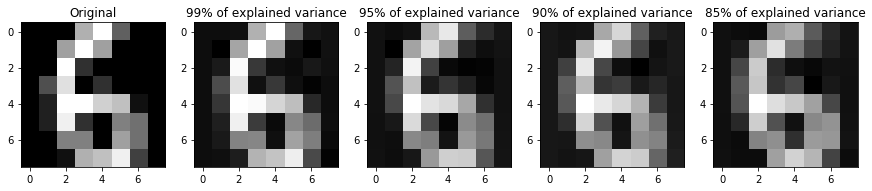

In [43]:
pca = PCA(n_components=41)
X_transformed = pca.fit_transform(digits.data.astype(float))
res99 = np.dot(X_transformed, pca.components_) + pca.mean_
pca = PCA(n_components=29)
X_transformed = pca.fit_transform(digits.data.astype(float))
res95 = np.dot(X_transformed, pca.components_) + pca.mean_
pca = PCA(n_components=21)
X_transformed = pca.fit_transform(digits.data.astype(float))
res90 = np.dot(X_transformed, pca.components_) + pca.mean_
pca = PCA(n_components=17)
X_transformed = pca.fit_transform(digits.data.astype(float))
res85 = np.dot(X_transformed, pca.components_) + pca.mean_

i = 532
fig, ax = plt.subplots(1, 5, figsize=(15,15))
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(res99[i].reshape(8, 8), cmap='gray')
ax[2].imshow(res95[i].reshape(8, 8), cmap='gray')
ax[3].imshow(res90[i].reshape(8, 8), cmap='gray')
ax[4].imshow(res85[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('99% of explained variance')
ax[2].set_title('95% of explained variance')
ax[3].set_title('90% of explained variance')
ax[4].set_title('85% of explained variance')
plt.show()

#### Задача 4. Предложите способ генерации новых изображений с числами и приведите примеры сгенерированных картинок.

Метод заключается в следующем: по осям главных компонент будем выбирать случайные координаты, ориентируясь на реальные картинки с цифрами.

In [177]:
pca = PCA(n_components=21)
X_transformed = pca.fit_transform(digits.data.astype(float))

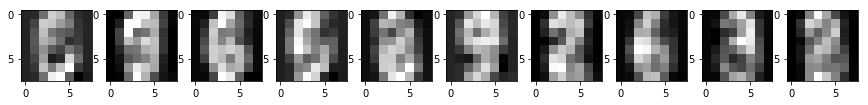

In [204]:
fig, ax = plt.subplots(1, 10, figsize=(15,3))
for i in range(10):
    x_transformed = np.array([np.random.normal(0, np.sqrt(pca.explained_variance_[i])/2) for i in range(21)])
    x_restored = pca.inverse_transform(x_transformed)
    ax[i].imshow(x_restored.reshape(8,8), cmap='gray')
plt.show()

Можно видеть, что картинки далеки от идеала, но всё же на многих получилось что-то весьма похожее на цифры. 